# 7. Mạng Nơ-ron Tích chập Hiện đại
Những mô hình hiện đại gồm có: *AlexNet*, mạng quy mô lớn đầu tiên được triển khai để đánh bại các phương pháp thị giác máy tính truyền thống trong một thử thách quy mô lớn; *VGG*, mạng tận dụng một số lượng các khối được lặp đi lặp lại; Mạng trong Mạng (*Network in Network - NiN*), một kiến trúc nhằm di chuyển toàn bộ mạng nơ-ron theo từng điểm ảnh ở đầu vào; *GoogLeNet* sử dụng các phép nối song song giữa các mạng; Mạng phần dư (*residual networks - ResNet*) là kiến trúc mạng được sử dụng phổ biến nhất hiện nay; và cuối cùng là Mạng tích chập kết nối dày đặc (*densely connected network - DenseNet*), dù yêu cầu khối lượng tính toán lớn nhưng thường được sử dụng làm mốc chuẩn trong thời gian gần đây.

## 7.1. Mạng Nơ-ron Tích chập Sâu (AlexNet)
Mặc dù đã trở nên nổi tiếng trong cộng đồng thị giác máy tính và học máy sau khi LeNet được giới thiệu, mạng nơ-ron tích chập chưa lập tức thống trị lĩnh vực này. Dẫu LeNet đã đạt được kết quả tốt trên những tập dữ liệu nhỏ, chất lượng và tính khả thi của việc huấn luyện mạng tích chập trên một tập dữ liệu lớn và sát thực tế hơn vẫn là một câu hỏi. Trên thực tế, hầu hết trong khoảng thời gian từ đầu những năm 1990 cho tới năm 2012 với những thành tựu mang tính bước ngoặt, mạng nơ-ron tích chập thường không sánh bằng những phương pháp học máy khác, như Máy Vector hỗ trợ - SVM.

Với thị giác máy tính, phép so sánh này dường như không công bằng. Nguyên nhân là do giá trị đầu vào của mạng tích chập chỉ bao gồm giá trị điểm ảnh thô hoặc đã xử lý thô (như định tâm ảnh (centering)), và kinh nghiệm cho thấy những giá trị thô này không bao giờ nên dùng trực tiếp trong các mô hình truyền thống. Thay vào đó, các hệ thống thị giác máy tính cổ điển dùng những pipeline trích xuất đặc trưng một cách thủ công. Thay vì được học, các đặc trưng được tạo thủ công. Hầu hết những tiến triển trong ngành đều đến từ các ý tưởng thông minh hơn trong tạo đặc trưng và ít để ý hơn tới thuật toán học.

Mặc dù cũng đã có các thiết bị phần cứng tăng tốc độ thực thi mạng nơ-ron vào đầu những năm 1990, chúng vẫn chưa đủ mạnh để triển khai những mạng nơ-ron nhiều kênh, nhiều tầng với số lượng tham số lớn. Ngoài ra, những tập dữ liệu vẫn còn tương đối nhỏ. Thêm vào đó, những thủ thuật chính để huấn luyện mạng nơ-ron bao gồm khởi tạo tham số dựa trên thực nghiệm, các biến thể tốt hơn của hạ gradient ngẫu nhiên, hàm kích hoạt không ép (non-squashing activation functions), và thiếu các kỹ thuật điều chuẩn hiệu quả.

Vì vậy, thay vì huấn luyện các hệ thống đầu-cuối (từ điểm ảnh đến phân loại), các pipeline cổ điển sẽ thực hiện các bước sau:

1. Thu thập tập dữ liệu đáng chú ý. Trong những ngày đầu, các tập dữ liệu này đòi hỏi các cảm biến đắt tiền (ảnh có 1 triệu điểm ảnh đã được coi là tối tân nhất vào thời điểm đó).
2. Tiền xử lý tập dữ liệu với các đặc trưng được tạo thủ công dựa trên các kiến thức quang học, hình học, các công cụ phân tích khác và thi thoảng dựa trên các khám phá tình cờ của các nghiên cứu sinh.
3. Đưa dữ liệu qua một bộ trích chọn đặc trưng tiêu chuẩn như [SIFT](https://en.wikipedia.org/wiki/Scale-invariant_feature_transform), hoặc [SURF](https://en.wikipedia.org/wiki/Speeded_up_robust_features), hay bất kỳ pipeline được tinh chỉnh thủ công nào.
4. Dùng các kết quả biểu diễn để huấn luyện một bộ phân loại ưa thích, có thể là một mô hình tuyến tính hoặc phương pháp hạt nhân.

Khi tiếp xúc với những nhà nghiên cứu học máy, bạn sẽ thấy họ tin rằng học máy không những quan trọng mà còn “đẹp” nữa. Bởi lẽ có nhiều lý thuyết tinh vi được đưa ra để chứng minh các tính chất của nhiều bộ phân loại. Và cứ như vậy, lĩnh vực học máy ngày một lớn mạnh, nghiêm ngặt, và hữu dụng hơn bao giờ hết. Tuy nhiên, nếu có dịp thảo luận với một nhà nghiên cứu thị giác máy tính, thì có thể ta lại được nghe một câu chuyện rất khác. Họ sẽ nói rằng sự thật trần trụi trong nhận dạng ảnh là “đặc trưng mới mang tính quyết định tới chất lượng chứ không phải thuật toán học”. Những nhà nghiên cứu thị giác máy tính thời đó có lý do để tin rằng chỉ cần một tập dữ liệu hơi lớn hơn, sạch hơn hoặc một pipeline trích xuất đặc trưng tốt hơn một chút sẽ có ảnh hưởng lớn hơn bất kỳ thuật toán học nào.

### 7.1.1. Học Biểu diễn Đặc trưng
Nói một cách khác, tại thời điểm đó phần lớn các nhà nghiên cứu tin rằng phần quan trọng nhất của pipeline là sự biểu diễn. Và cho tới năm 2012 việc biểu diễn vẫn được tính toán một cách máy móc. Trong thực tế, thiết kế và xây dựng một tập các hàm đặc trưng mới, cải thiện kết quả, và viết ra phương pháp thực hiện từng là một phần quan trọng của các bài báo nghiên cứu. SIFT, SURF, HOG, Bags of visual words và các bộ trích chọn đặc trưng tương tự đã chiếm ưu thế vượt trội.

Một nhóm các nhà nghiên cứu bao gồm Yann LeCun, Geoff Hinton, Yoshua Bengio, Andrew Ng, Shun-ichi Amari, và Juergen Schmidhuber, lại có những kế hoạch khác. Họ tin rằng đặc trưng cũng có thể được học. Hơn nữa, họ cũng cho rằng để có được độ phức tạp hợp lý, các đặc trưng nên được phân thành thứ lớp với nhiều tầng học cùng nhau, mỗi tầng có các tham số có thể được huấn luyện. Trong trường hợp ảnh, các tầng thấp nhất có thể dùng để phát hiện biên, màu sắc và đường nét. Thật vậy, [Krizhevsky et al., 2012](https://d2l.aivivn.com/chapter_references/zreferences.html#krizhevsky-sutskever-hinton-2012) giới thiệu một biến thể mới của mạng nơ-ron tích chập đã đạt được hiệu năng xuất sắc trong cuộc thi ImageNet.

Một điều thú vị là ở các tầng thấp nhất của mạng, mô hình đã học được cách trích xuất đặc trưng giống như các bộ lọc truyền thống. Fig. 7.1.1 được tái tạo từ bài báo khoa học trên mô tả các đặc trưng cấp thấp của hình ảnh.

![](images/filters.png)

Fig. 7.1.1 Các bộ lọc hình ảnh học được ở tầng đầu tiên của mô hình AlexNet

Các tầng cao hơn của mạng sẽ dựa vào các biểu diễn này để thể hiện các cấu trúc lớn hơn như mắt, mũi, ngọn cỏ, v.v. Thậm chí các tầng cao hơn nữa có thể đại diện cho nguyên một vật thể như con người, máy bay, chó hoặc là đĩa ném. Sau cùng, tầng trạng thái ẩn cuối sẽ học cách biểu diễn cô đọng của toàn bộ hình ảnh để tổng hợp lại nội dung sao cho dữ liệu thuộc các lớp khác nhau có thể được dễ dàng phân biệt.

Mặc dù bước đột phá của các mạng tích chập nhiều tầng xuất hiện vào năm 2012, một nhóm nòng cốt các nhà nghiên cứu đã theo đuổi ý tưởng này, tìm cách học các biểu diễn phân tầng của dữ liệu hình ảnh trong nhiều năm. Có hai yếu tố chính dẫn tới bước đột phá lớn vào năm 2012.

#### 7.1.1.1. Yếu tố bị Thiếu - Dữ liệu
Mô hình học sâu với nhiều tầng đòi hỏi phải có một lượng dữ liệu lớn để đạt hiệu quả vượt trội so với các phương pháp truyền thống dựa trên tối ưu lồi (ví dụ: phương pháp tuyến tính và phương pháp nhân). Tuy nhiên, do khả năng lưu trữ của máy tính còn hạn chế, các bộ cảm biến khá đắt đỏ, và ngân sách dành cho việc nghiên cứu tương đối bị thắt chặt vào những năm 1990, phần lớn các nghiên cứu đều dựa trên những bộ dữ liệu nhỏ. Có rất nhiều bài báo nghiên cứu khoa học giải quyết các vấn đề dựa trên bộ dữ liệu tổng hợp UCI, nhiều bộ dữ liệu trong số đó chỉ chứa khoảng vài trăm hoặc (một vài) ngàn hình ảnh được chụp trong điều kiện không tự nhiên với độ phân giải thấp.

Năm 2009, tập dữ liệu ImageNet được ban hành, thách thức các nhà nghiên cứu huấn luyện những mô hình với 1 triệu hình ảnh, trong đó có 1.000 ảnh cho mỗi 1.000 lớp đối tượng khác nhau. Các nhà nghiên cứu giới thiệu tập dữ liệu này, dẫn đầu bởi Fei-Fei Li, đã tận dụng công cụ Tìm kiếm Hình ảnh của Google để lọc sơ bộ các tập dữ liệu hình ảnh lớn cho mỗi lớp và sử dụng dịch vụ cộng đồng (*crowdsourcing*) Amazon Mechanical Turk để xác thực nhãn cho từng ảnh. Đây là quy mô lớn chưa từng có từ trước đến nay. Cuộc thi đi liền với tập dữ liệu này được đặt tên là ImageNet Challenge và đã thúc đẩy sự phát triển của nghiên cứu thị giác máy tính và học máy, thách thức các nhà nghiên cứu tìm ra mô hình tốt nhất ở quy mô lớn hơn bao giờ hết trong toàn giới học thuật.

#### 7.1.1.2. Yếu tố bị Thiếu - Phần cứng
Các mô hình học sâu đòi hỏi rất nhiều chu kỳ tính toán. Quá trình huấn luyện có thể cần hàng trăm epoch, với mỗi vòng lặp yêu cầu đưa dữ liệu qua nhiều tầng nơi các phép toán đại số tuyến tính cồng kềnh được thực thi. Đây là một trong những lý do chính tại sao vào những năm 90 tới đầu những năm 2000, các thuật toán đơn giản dựa trên những mục tiêu tối ưu lồi hiệu quả lại được ưa chuộng hơn.

Bộ xử lý đồ hoạ (GPU) đóng vai trò thay đổi hoàn toàn cuộc chơi khi làm cho việc học sâu trở nên khả thi. Những vi xử lý này đã được phát triển một thời gian dài để tăng tốc độ xử lý đồ họa dành cho các trò chơi máy tính. Cụ thể, chúng được tối ưu hoá cho các phép nhân ma trận - vector 4x4 thông lượng cao, cần thiết cho nhiều tác vụ đồ hoạ. May mắn thay, phép toán này rất giống với phép toán sử dụng trong các tầng tích chập. Trong khoảng thời gian này, hai công ty NVIDIA và ATI đã bắt đầu tối ưu GPU cho mục đích tính toán tổng quát, thậm chí còn tiếp thị chúng dưới dạng GPU đa dụng (*General Purpose GPUs - GPGPU*).

Để hình dung rõ hơn, hãy cùng xem lại các nhân của bộ vi xử lý CPU hiện đại. Mỗi nhân thì khá mạnh khi chạy ở tần số xung nhịp cao với bộ nhớ đệm lớn (lên đến vài MB ở bộ nhớ đệm L3). Mỗi nhân phù hợp với việc thực hiện hàng loạt các loại chỉ dẫn khác nhau, với các bộ dự báo rẽ nhánh, một pipeline sâu và những tính năng phụ trợ khác cho phép nó có khả năng chạy một lượng lớn các chương trình khác nhau. Tuy nhiên, sức mạnh rõ rệt này cũng có điểm yếu: sản xuất các nhân đa dụng rất đắt đỏ. Chúng đòi hỏi nhiều diện tích cho vi xử lý, cùng cấu trúc hỗ trợ phức tạp (giao diện bộ nhớ, logic bộ nhớ đệm giữa các nhân, kết nối tốc độ cao, v.v.), và chúng tương đối tệ ở bất kỳ tác vụ đơn lẻ nào. Những máy tính xách tay ngày nay chỉ có tới 4 nhân, và thậm chí những máy chủ cao cấp hiếm khi vượt quá 64 nhân, đơn giản bởi vì chúng không hiệu quả về chi phí.

Để so sánh, GPU bao gồm 100-1000 các phần tử xử lý nhỏ (về chi tiết có khác nhau đôi chút giữa NVIDIA, ATI, ARM và các nhà sản xuất khác), thường được gộp thành các nhóm lớn hơn (NVIDIA gọi các nhóm này là luồng (*warp*)). Mặc dù mỗi nhân thì tương đối yếu, đôi khi thậm chí chạy ở tần số xung nhịp dưới 1GHZ, nhưng số lượng của những nhân này giúp cho GPUs có tốc độ nhanh hơn rất nhiều so với CPUs. Chẳng hạn, thế hệ Volta mới nhất của NVIDIA có thể thực hiện tới 120 nghìn tỷ phép toán dấu phẩy động (TFlop) với mỗi vi xử lý cho những lệnh chuyên biệt (và lên tới 24 TFlop cho các lệnh đa dụng), trong khi hiệu năng của CPU trong việc thực hiện tính toán số thực dấu phẩy động cho đến nay không vượt quá 1 TFlop. Lý do khá đơn giản: thứ nhất, mức độ tiêu thụ năng lượng có xu hướng tăng theo hàm bậc hai so với tần số xung nhịp. Do đó, với cùng lượng năng lượng để một nhân CPU chạy nhanh gấp 4 lần tốc độ hiện tại (mức tăng thường gặp), chúng ta có thể thay bằng 16 nhân GPU với tốc độ mỗi nhân giảm còn 1/4, cũng sẽ cho kết quả là 16 x 1/4 = 4 lần tốc độ hiện tại. Hơn nữa, các nhân của GPU thì đơn giản hơn nhiều (trên thực tế, trong một khoảng thời gian dài những nhân này thậm chí không thể thực thi được các mã lệnh đa dụng), điều này giúp chúng tiết kiệm năng lượng hơn. Cuối cùng, nhiều phép tính trong quá trình học sâu đòi hỏi bộ nhớ băng thông cao. Và một lần nữa, GPUs tỏa sáng khi độ rộng đường bus của nó lớn hơn ít nhất 10 lần so với nhiều loại CPUs.

Quay trở lại năm 2012. Một bước đột phá lớn khi Alex Krizhevsky và Ilya Sutskever đã xây dựng thành công một mạng nơ-ron tích chập sâu có thể chạy trên phần cứng GPU. Họ nhận ra rằng nút thắt cổ chai khi tính toán trong CNN (phép nhân tích chập và ma trận) có thể được xử lý song song trên phần cứng. Sử dụng hai card đồ họa NVIDIA GTX 580s với 3GB bộ nhớ, họ đã xây dựng các phép toán tích chập nhanh. Phần mã nguồn [cuda-convnet](https://code.google.com/archive/p/cuda-convnet/) được xem là ngòi nổ cho sự phát triển vượt bậc của học sâu ngày nay.

### 7.1.2. Mạng AlexNet
Mạng AlexNet được giới thiệu vào năm 2012, được đặt theo tên của Alex Krizhevsky, tác giả thứ nhất của bài báo đột phá trong phân loại ImageNet [Krizhevsky et al., 2012]. Mạng AlexNet bao gồm 8 tầng mạng nơ-ron tích chập, đã chiến thắng cuộc thi **ImageNet Large Scale Visual Recognition Challenge** năm 2012 với cách biệt không tưởng. AlexNet lần đầu tiên đã chứng minh được rằng các đặc trưng thu được bởi việc học có thể vượt qua các đặc trưng được thiết kế thủ công, phá vỡ định kiến trước đây trong nghiên cứu thị giác máy tính. Cấu trúc mạng AlexNet và LeNet *rất giống nhau*, như Fig. 7.1.2 đã minh họa. Lưu ý rằng chúng tôi cung cấp một phiên bản AlexNet được sắp xếp hợp lý, loại bỏ một số điểm thiết kế có từ năm 2012 với mục đích làm cho mô hình phù hợp với hai GPU dung lượng nhỏ mà bây giờ đã không còn cần thiết.

![](images/alexnet.svg)
Fig. 7.1.2 LeNet (trái) và AlexNet (phải)

Các triết lý thiết kế của AlexNet và LeNet rất giống nhau, nhưng cũng có những khác biệt đáng kể. Đầu tiên, AlexNet sâu hơn nhiều so với LeNet5. AlexNet có tám tầng gồm: năm tầng tích chập, hai tầng ẩn kết nối đầy đủ, và một tầng đầu ra kết nối đầy đủ. Thứ hai, AlexNet sử dụng **ReLU** thay vì **sigmoid** làm hàm kích hoạt. Chúng tôi sẽ đi sâu hơn vào chi tiết ở dưới đây.

#### 7.1.2.1. Kiến trúc
Trong tầng thứ nhất của AlexNet, kích thước cửa sổ tích chập là  $11×11$ . Vì hầu hết các ảnh trong ImageNet đều có chiều cao và chiều rộng lớn gấp hơn mười lần so với các ảnh trong MNIST, các vật thể trong dữ liệu ImageNet thường có xu hướng chiếm nhiều điểm ảnh hơn. Do đó, ta cần sử dụng một cửa sổ tích chập lớn hơn để xác định được các vật thể này. Kích thước cửa sổ tích chập trong tầng thứ hai được giảm xuống còn  $5×5$  và sau đó là  $3×3$ . Ngoài ra, theo sau các tầng chập thứ nhất, thứ hai và thứ năm là các tầng gộp cực đại với kích thước cửa sổ là  $3×3$  và sải bước bằng 2. Hơn nữa, số lượng các kênh tích chập trong AlexNet nhiều hơn gấp mười lần so với LeNet.

Sau tầng tích chập cuối cùng là hai tầng kết nối đầy đủ với 4096 đầu ra. Hai tầng này tạo ra tới gần 1 GB các tham số mô hình. Do các GPU thế hệ trước bị giới hạn về bộ nhớ, phiên bản gốc của AlexNet sử dụng thiết kế luồng dữ liệu kép cho hai GPU, trong đó mỗi GPU chỉ phải chịu trách nhiệm lưu trữ và tính toán cho một nửa mô hình. May mắn thay, hiện nay các GPU có bộ nhớ tương đối dồi dào, vì vậy ta hiếm khi cần phải chia nhỏ mô hình trên các GPU (phiên bản mô hình AlexNet của ta khác với bài báo ban đầu ở khía cạnh này).

#### 7.1.2.2. Các hàm Kích hoạt
Thứ hai, AlexNet đã thay hàm kích hoạt *sigmoid* bằng hàm kích hoạt *ReLU* đơn giản hơn. Một mặt là giảm việc tính toán, bởi *ReLu* không có phép lũy thừa như trong hàm kích hoạt *sigmoid*. Mặt khác, hàm kích hoạt *ReLU* giúp cho việc huấn luyện mô hình trở nên dễ dàng hơn khi sử dụng các phương thức khởi tạo tham số khác nhau. Điều này là do khi đầu ra của hàm kích hoạt sigmoid rất gần với 0 hoặc 1 thì gradient sẽ gần như bằng 0, vì vậy khiến cho lan truyền ngược không thể tiếp tục cập nhật một số tham số mô hình. Ngược lại, gradient của hàm kích hoạt *ReLU* trong khoảng dương luôn bằng 1. Do đó, nếu các tham số mô hình không được khởi tạo đúng cách thì hàm *sigmoid* có thể có gradient gần bằng 0 trong khoảng dương, dẫn đến việc mô hình không được huấn luyện một cách hiệu quả.

#### 7.1.2.3. Kiểm soát năng lực mô hình và Tiền xử lý
AlexNet kiểm soát năng lực của tầng kết nối đầy đủ bằng cách áp dụng dropout (Section 4.6), trong khi LeNet chỉ sử dụng suy giảm trọng số. Để tăng cường dữ liệu thì trong quá trình huấn luyện, AlexNet đã bổ sung rất nhiều kỹ thuật tăng cường hình ảnh chẳng hạn như lật, cắt hay thay đổi màu sắc. Điều này giúp cho mô hình trở nên mạnh mẽ hơn, cùng với đó kích thước dữ liệu lớn hơn giúp làm giảm hiện tượng quá khớp một cách hiệu quả. Ta sẽ thảo luận chi tiết hơn về việc tăng cường dữ liệu trong Section 13.1.

In [1]:
from d2l import torch as d2l
import torch
from torch import nn

net = nn.Sequential(
    # Here, we use a larger 11x11 window to capture objects. At the same
    # time, we use a stride of 4 to greatly reduce the height and width of the 
    # output. Here, the number of output channels is much larger than that in Lenet
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Make the convolution window smaller, set padding to 2 for consistent
    # height and width across the input and output, and increase the number of
    # output channels
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # Use three succesive convutional layers and a smaller convolution
    # window. Except for the final convolution layer, the number of output
    # channels is further increased. Pooling layers are not used to reduce the
    # height and width of input after the first tow convolution layers
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    nn.Flatten(),
    # Here, the number of outputs of the fully-connected layer is several
    # times larger than in LeNet. Use the dropout layer to mitigate
    # overfitting
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    # Output layer. Since we are using Fashion-MNIST, the number of classes is
    # 10, instead of 1000 as in the paper
    nn.Linear(4096, 10)
)

Ta sẽ tạo một thực thể dữ liệu đơn kênh với chiều cao và chiều rộng đều bằng 224 để quan sát kích thước đầu ra của mỗi tầng. Kết quả in ra khớp với sơ đồ bên trên.

In [2]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X=layer(X)
    print(layer.__class__.__name__,'Output shape:\t',X.shape)

Conv2d Output shape:	 torch.Size([1, 96, 54, 54])
ReLU Output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d Output shape:	 torch.Size([1, 96, 26, 26])
Conv2d Output shape:	 torch.Size([1, 256, 26, 26])
ReLU Output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d Output shape:	 torch.Size([1, 256, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 384, 12, 12])
ReLU Output shape:	 torch.Size([1, 384, 12, 12])
Conv2d Output shape:	 torch.Size([1, 256, 12, 12])
ReLU Output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d Output shape:	 torch.Size([1, 256, 5, 5])
Flatten Output shape:	 torch.Size([1, 6400])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1, 4096])
ReLU Output shape:	 torch.Size([1, 4096])
Dropout Output shape:	 torch.Size([1, 4096])
Linear Output shape:	 torch.Size([1,

### 7.1.3. Đọc Tập dữ liệu
Mặc dù AlexNet sử dụng ImageNet trong bài báo nêu trên, ở đây ta sẽ sử dụng Fashion-MNIST vì ngay cả với một GPU hiện đại thì việc huấn luyện một mô hình trên ImageNet có thể mất nhiều giờ hoặc nhiều ngày để hội tụ. Một trong những vấn đề khi áp dụng AlexNet trực tiếp trên Fashion-MNIST là các ảnh trong tập dữ liệu này có độ phân giải thấp hơn ( $28×28$  điểm ảnh) so với các ảnh trong ImageNet. Để có thể tiến hành được thử nghiệm, ta sẽ nâng kích thước ảnh lên  $224×224$  (nói chung đây không phải là một giải pháp thông minh, nhưng ta cần làm việc này để có thể sử dụng kiến trúc gốc của AlexNet). Việc thay đổi kích thước có thể được thực hiện thông qua đối số `resize` trong hàm `load_data_fashion_mnist`.

In [3]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

### 7.1.4 Training
Bây giờ, ta có thể bắt đầu quá trình huấn luyện AlexNet. So với LeNet, thay đổi chính ở đây là việc sử dụng tốc độ học nhỏ hơn và quá trình huấn luyện chậm hơn nhiều do tính chất sâu và rộng hơn của mạng, đồng thời do độ phân giải hình ảnh cao hơn và việc tính toán các phép tích chập tốn kém hơn

loss 0.327, train acc 0.880, test acc 0.881
837.4 examples/sec on cuda:0


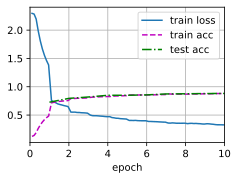

In [4]:
lr, num_epochs = 0.01, 10
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

### 7.1.5. Tóm tắt
* AlexNet có cấu trúc tương tự như LeNet, nhưng sử dụng nhiều tầng tích chập hơn với không gian tham số lớn hơn để khớp tập dữ liệu ImageNet với kích thước lớn.
* Ngày nay AlexNet đã bị vượt qua bởi các kiến trúc hiệu quả hơn nhiều nhưng nó là một bước quan trọng để đi từ các mạng nông đến các mạng sâu được sử dụng ngày nay.
* Mặc dù có vẻ như chỉ tốn thêm một vài dòng trong mã nguồn của AlexNet so với LeNet, nhưng cộng đồng học thuật đã phải mất nhiều năm để đón nhận sự thay đổi khái niệm này và tận dụng những kết quả thực nghiệm tuyệt vời của nó. Một phần cũng do sự thiếu thốn của các công cụ tính toán hiệu quả.
* Dropout, ReLU và tiền xử lý là những bước quan trọng khác để đạt được kết quả xuất sắc trong các bài toán thị giác máy tính.

### 7.1.6. Bài tập
1. Thử tăng số lượng epoch và xem kết quả khác như thế nào so với LeNet? Tại sao lại có sự khác nhau như vậy?
2. AlexNet có thể là quá phức tạp đối với tập dữ liệu Fashion-MNIST. Vậy:
    * Hãy thử đơn giản hóa mô hình để làm cho việc huấn luyện trở nên nhanh hơn nhưng đồng thời vẫn đảm bảo độ chính xác không bị giảm đi đáng kể.
    * Hãy thử thiết kế một mô hình tốt hơn có thể hoạt động trực tiếp trên các ảnh có kích thước  $28×28$ .
3. Điều chỉnh kích thước batch và quan sát các thay đổi về độ chính xác và việc tiêu thụ bộ nhớ GPU.
4. Băng thông bộ nhớ hoạt động như thế nào khi tính toán các kết quả? Phần nào trong thiết kế của AlexNet có ảnh hưởng lớn đến:
    * Việc sử dụng bộ nhớ của mạng này?
    * Sự tính toán của mạng này?
5. Khi áp dụng dropout và ReLU cho LeNet5, độ chính xác của mô hình có được cải thiện hay không? Dữ liệu được tiền xử lý như thế nào?

## 7.2. Mạng sử dụng Khối (VGG)
Mặc dù AlexNet đã chứng minh rằng các mạng nơ-ron tích chập có thể đạt được kết quả tốt, nó lại không cung cấp một khuôn mẫu chung để định hướng nghiên cứu sau này trong việc thiết kế các mạng mới. Trong các phần tiếp theo, chúng tôi sẽ giới thiệu một số khái niệm dựa trên thực nghiệm được sử dụng rộng rãi khi thiết kế mạng học sâu.

Sự phát triển trong lĩnh vực này có nét tương đồng tiến triển trong ngành thiết kế vi xử lý, chuyển từ việc sắp đặt các bóng bán dẫn, đến các phần tử logic và các khối logic.
Tương tự như vậy, việc thiết kế kiến trúc các mạng nơ-ron đã phát triển theo hướng ngày một trừu tượng hơn. Điển hình là việc các nhà nghiên cứu đã thay đổi suy nghĩ từ quy mô các nơ-ron riêng lẻ sang các tầng, và giờ đây là các khối chứa các tầng lặp lại theo khuôn mẫu.
Ý tưởng sử dụng các khối lần đầu xuất hiện trong mạng VGG, được đặt theo tên của nhóm [VGG](http://www.robots.ox.ac.uk/~vgg/) thuộc Đại học Oxford. Sử dụng bất kỳ các framework học sâu hiện đại nào với vòng lặp và chương trình con để xây dựng các cấu trúc lặp lại này là tương đối dễ dàng.

### 7.2.1. Khối VGG
Khối cơ bản của mạng tích chập cổ điển là một chuỗi các tầng sau đây: (i) một tầng tích chập (với phần đệm để duy trì độ phân giải), (ii) một tầng phi tuyến như ReLU, (iii) một tầng gộp như tầng gộp cực đại. Một khối VGG gồm một chuỗi các tầng tích chập, tiếp nối bởi một tầng gộp cực đại để giảm chiều không gian. Trong bài báo gốc của VGG [Simonyan & Zisserman, 2014](https://d2l.aivivn.com/chapter_references/zreferences.html#simonyan-zisserman-2014), tác giả sử dụng tích chập với các hạt nhân  3×3  và tầng gộp cực đại  2×2  với sải bước bằng  2  (giảm một nửa độ phân giải sau mỗi khối). Trong mã nguồn dưới đây, ta định nghĩa một hàm tên `vgg_block` để tạo một khối VGG. Hàm này nhận hai đối số `num_convs` và `num_channels` tương ứng lần lượt với số tầng tích chập và số kênh đầu ra.

In [5]:
from d2l import torch as d2l
import torch
from torch import nn

def vgg_block(num_convs, in_channels, out_channels):
    layers=[]
    for _ in range(num_convs):
        layers.append(nn.Conv2d(in_channels, out_channels,
                               kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

### 7.2.2. Mạng VGG
Giống như AlexNet và LeNet, mạng VGG có thể được phân chia thành hai phần: phần đầu tiên bao gồm chủ yếu các tầng tích chập và tầng gộp, còn phần thứ hai bao gồm các tầng kết nối đầy đủ. Phần tích chập của mạng gồm các mô-đun `vgg_block` kết nối liên tiếp với nhau. Trong Fig. 7.2.1, biến `conv_arch` bao gồm một danh sách các tuples (một tuple cho mỗi khối), trong đó mỗi tuple chứa hai giá trị: số lượng tầng tích chập và số kênh đầu ra, cũng chính là những đối số cần thiết để gọi hàm `vgg_block`. Mô-đun kết nối đầy đủ giống hệt với mô-đun tương ứng trong AlexNet.

![](images/vgg.svg)

Mạng VGG gốc có 5 khối tích chập, trong đó hai khối đầu tiên bao gồm một tầng tích chập ở mỗi khối, ba khối còn lại chứa hai tầng tích chập ở mỗi khối. Khối đầu tiên có 64 kênh đầu ra, mỗi khối tiếp theo nhân đôi số kênh đầu ra cho tới khi đạt giá trị  512 . Vì mạng này sử dụng  8  tầng tích chập và  3  tầng kết nối đầy đủ nên nó thường được gọi là VGG-11.

In [6]:
conv_arch = ((1, 64), (1, 128), (1, 256), (2, 512), (2, 512))

Đoạn mã nguồn sau đây lập trình mạng VGG-11. Ở đây ta chỉ đơn thuần thực hiện vòng lặp `for` trên biến `conv_arch`.

In [7]:
def vgg(conv_arch):
    conv_blks=[]
    in_channels=1
    for (num_conv, out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_conv, in_channels, out_channels))
        in_channels = out_channels
        
    return nn.Sequential(
    *conv_blks, nn.Flatten(),
    # The fully-connected part
    nn.Linear(out_channels * 7 * 7, 4096), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(4096, 4096), nn.ReLU(), nn.Dropout(0.5),
    nn.Linear(4096, 10))

net = vgg(conv_arch)

Tiếp theo, chúng ta sẽ tạo một mẫu dữ liệu một kênh với chiều cao và chiều rộng là 224 để quan sát kích thước đầu ra của mỗi tầng.

In [8]:
X = torch.randn(size=(1, 1, 224, 224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


Như bạn thấy, ta đã giảm chiều cao và chiều rộng đi một nửa sau mỗi khối, cuối cùng kích thước của các biễu diễn chỉ còn là 7 trên mỗi chiều trước khi được trải phẳng ra để tiếp tục xử lý trong tầng kết nối đầy đủ.

### 7.2.3. Huấn luyện Mô hình
Vì VGG-11 thực hiện nhiều tính toán hơn AlexNet, ta sẽ xây dựng một mạng với số kênh nhỏ hơn. Như vậy vẫn là quá đủ để huấn luyện trên bộ dữ liệu Fashion-MNIST.

In [9]:
ratio = 4
small_conv_arch = [(pair[0], pair[1] // ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

Ngoại trừ việc sử dụng tốc độ học lớn hơn một chút, quy trình huấn luyện mô hình này tương tự như của AlexNet trong phần trước.

training on cuda:0


RuntimeError: CUDA out of memory. Tried to allocate 50.00 MiB (GPU 0; 4.00 GiB total capacity; 2.41 GiB already allocated; 1.69 MiB free; 2.53 GiB reserved in total by PyTorch)
Exception raised from malloc at ..\c10\cuda\CUDACachingAllocator.cpp:272 (most recent call first):
00007FFC2E9175A200007FFC2E917540 c10.dll!c10::Error::Error [<unknown file> @ <unknown line number>]
00007FFC2E8B9C0600007FFC2E8B9B90 c10_cuda.dll!c10::CUDAOutOfMemoryError::CUDAOutOfMemoryError [<unknown file> @ <unknown line number>]
00007FFC2E8C069600007FFC2E8BF370 c10_cuda.dll!c10::cuda::CUDACachingAllocator::init [<unknown file> @ <unknown line number>]
00007FFC2E8C083A00007FFC2E8BF370 c10_cuda.dll!c10::cuda::CUDACachingAllocator::init [<unknown file> @ <unknown line number>]
00007FFC2E8B509900007FFC2E8B4EB0 c10_cuda.dll!c10::cuda::CUDAStream::unpack [<unknown file> @ <unknown line number>]
00007FFBF0071FF100007FFBF0071EB0 torch_cuda.dll!at::native::empty_cuda [<unknown file> @ <unknown line number>]
00007FFBF0188AFE00007FFBF012E0A0 torch_cuda.dll!at::native::set_storage_cuda_ [<unknown file> @ <unknown line number>]
00007FFBF01842A500007FFBF012E0A0 torch_cuda.dll!at::native::set_storage_cuda_ [<unknown file> @ <unknown line number>]
00007FFBE8181A3A00007FFBE816D9D0 torch_cpu.dll!at::native::mkldnn_sigmoid_ [<unknown file> @ <unknown line number>]
00007FFBE818000500007FFBE816D9D0 torch_cpu.dll!at::native::mkldnn_sigmoid_ [<unknown file> @ <unknown line number>]
00007FFBE82518A000007FFBE8248FA0 torch_cpu.dll!at::bucketize_out [<unknown file> @ <unknown line number>]
00007FFBE82628DC00007FFBE8262850 torch_cpu.dll!at::empty [<unknown file> @ <unknown line number>]
00007FFBE8025C6100007FFBE8025780 torch_cpu.dll!at::native::empty_like [<unknown file> @ <unknown line number>]
00007FFBE83271C200007FFBE82AD060 torch_cpu.dll!at::zeros_out [<unknown file> @ <unknown line number>]
00007FFBE7DE21EE00007FFBE7DD6470 torch_cpu.dll!torch::nn::functional::BatchNormFuncOptions::~BatchNormFuncOptions [<unknown file> @ <unknown line number>]
00007FFBE824F44F00007FFBE8248FA0 torch_cpu.dll!at::bucketize_out [<unknown file> @ <unknown line number>]
00007FFBE8262C8200007FFBE8262C00 torch_cpu.dll!at::empty_like [<unknown file> @ <unknown line number>]
00007FFBE802A93800007FFBE802A840 torch_cpu.dll!at::native::zeros_like [<unknown file> @ <unknown line number>]
00007FFBE833F7D400007FFBE82AD060 torch_cpu.dll!at::zeros_out [<unknown file> @ <unknown line number>]
00007FFBE7DE21EE00007FFBE7DD6470 torch_cpu.dll!torch::nn::functional::BatchNormFuncOptions::~BatchNormFuncOptions [<unknown file> @ <unknown line number>]
00007FFBE824F44F00007FFBE8248FA0 torch_cpu.dll!at::bucketize_out [<unknown file> @ <unknown line number>]
00007FFBE82ACFF200007FFBE82ACF70 torch_cpu.dll!at::zeros_like [<unknown file> @ <unknown line number>]
00007FFBEF50D40800007FFBEF50D3B0 torch_cuda.dll!at::native::max_pool2d_with_indices_backward_cuda [<unknown file> @ <unknown line number>]
00007FFBF018EE5900007FFBF012E0A0 torch_cuda.dll!at::native::set_storage_cuda_ [<unknown file> @ <unknown line number>]
00007FFBF0181FA100007FFBF012E0A0 torch_cuda.dll!at::native::set_storage_cuda_ [<unknown file> @ <unknown line number>]
00007FFBE824E28000007FFBE8248FA0 torch_cpu.dll!at::bucketize_out [<unknown file> @ <unknown line number>]
00007FFBE827A22500007FFBE827A140 torch_cpu.dll!at::max_pool2d_with_indices_backward [<unknown file> @ <unknown line number>]
00007FFBE95DB72700007FFBE94EE010 torch_cpu.dll!torch::autograd::GraphRoot::apply [<unknown file> @ <unknown line number>]
00007FFBE81C2C7100007FFBE816D9D0 torch_cpu.dll!at::native::mkldnn_sigmoid_ [<unknown file> @ <unknown line number>]
00007FFBE824E28000007FFBE8248FA0 torch_cpu.dll!at::bucketize_out [<unknown file> @ <unknown line number>]
00007FFBE827A22500007FFBE827A140 torch_cpu.dll!at::max_pool2d_with_indices_backward [<unknown file> @ <unknown line number>]
00007FFBE944CE0400007FFBE944CBD0 torch_cpu.dll!torch::autograd::generated::MaxPool2DWithIndicesBackward::apply [<unknown file> @ <unknown line number>]
00007FFBE9427E9100007FFBE9427B50 torch_cpu.dll!torch::autograd::Node::operator() [<unknown file> @ <unknown line number>]
00007FFBE998F9BA00007FFBE998F300 torch_cpu.dll!torch::autograd::Engine::add_thread_pool_task [<unknown file> @ <unknown line number>]
00007FFBE99903AD00007FFBE998FFD0 torch_cpu.dll!torch::autograd::Engine::evaluate_function [<unknown file> @ <unknown line number>]
00007FFBE9994FE200007FFBE9994CA0 torch_cpu.dll!torch::autograd::Engine::thread_main [<unknown file> @ <unknown line number>]
00007FFBE9994C4100007FFBE9994BC0 torch_cpu.dll!torch::autograd::Engine::thread_init [<unknown file> @ <unknown line number>]
00007FFBCEBB08F700007FFBCEB89F80 torch_python.dll!THPShortStorage_New [<unknown file> @ <unknown line number>]
00007FFBE998BF1400007FFBE998B780 torch_cpu.dll!torch::autograd::Engine::get_base_engine [<unknown file> @ <unknown line number>]
00007FFC8B8B10B200007FFC8B8B0F70 ucrtbase.dll!beginthreadex [<unknown file> @ <unknown line number>]
00007FFC8CEF7C2400007FFC8CEF7C10 KERNEL32.DLL!BaseThreadInitThunk [<unknown file> @ <unknown line number>]
00007FFC8DCECEA100007FFC8DCECE80 ntdll.dll!RtlUserThreadStart [<unknown file> @ <unknown line number>]


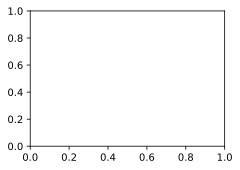

In [10]:
lr, num_epochs, batch_size = 0.05, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

### 7.2.4. Tóm tắt
* Mạng VGG-11 được xây dựng bằng cách tái sử dụng các khối tích chập. Các mô hình VGG khác nhau có thể được định nghĩa bằng cách thay đổi số lượng các tầng tích chập và số kênh đầu ra ở mỗi khối.
* Việc sử dụng các khối giúp ta định nghĩa mạng bằng các đoạn mã nguồn ngắn gọn và thiết kế các mạng phức tạp một cách hiệu quả hơn.
* Thử nghiệm nhiều kiến trúc khác nhau, Simonyan và Zisserman đã phát hiện rằng mạng có cửa sổ tích chập hẹp (như  $3×3$ ) và nhiều tầng cho hiệu quả cao hơn mạng có cửa sổ tích chập rộng nhưng ít tầng.

### 7.2.5. Bài tập
1. Khi in ra kích thước của các tầng, chúng ta chỉ thấy 8 kết quả chứ không phải 11. Thông tin về 3 tầng còn lại nằm ở đâu?
2. So với AlexNet, VGG chậm hơn đáng kể về mặt tính toán và cũng đòi hỏi nhiều bộ nhớ GPU hơn. Hãy phân tích lý do cho hiện tượng này?
3. Thử thay đổi chiều cao vầ chiều rộng của các ảnh trong Fashion-MNIST từ 224 xuống 96. Điều này ảnh hưởng thế nào tới các thử nghiệm?
4. Tham khảo Bảng 1 trong [Simonyan & Zisserman, 2014] để xây dựng các mô hình thông dụng khác, ví dụ như là VGG-16 và VGG-19.

# 7.3. Mạng trong Mạng (Network in Network - NiN)
LeNet, AlexNet và VGG đều có chung một khuôn mẫu thiết kế: trích xuất các đặc trưng khai thác cấu trúc không gian thông qua một chuỗi các phép tích chập và các tầng gộp, sau đó hậu xử lý các biểu diễn thông qua các tầng kết nối đầy đủ. Những cải tiến so với LeNet của AlexNet và VGG chủ yếu nằm ở việc mở rộng và tăng chiều sâu hai mô-đun này. Một lựa chọn khác là ta có thể sử dụng các tầng kết nối đầy đủ ngay từ giai đoạn trước. Tuy nhiên, việc tùy tiện sử dụng các tầng kết nối dày đặc có thể làm mất đi cấu trúc không gian của biểu diễn. Dùng các khối của Mạng trong Mạng (Network in Network - NiN) là một giải pháp thay thế khác. Ý tưởng này được đề xuất trong [Lin et al., 2013](https://arxiv.org/abs/1312.4400) dựa trên một thay đổi rất đơn giản — sử dụng MLP trên các kênh cho từng điểm ảnh riêng biệt.

## 7.3.1. Khối NiN
Hãy nhớ lại rằng đầu vào và đầu ra của các tầng tích chập là các mảng bốn chiều với các trục tương ứng với batch, kênh, chiều cao và chiều rộng. Đầu vào và đầu ra của các tầng kết nối đầy đủ thường là các mảng hai chiều tương ứng với batch và các đặc trưng. Ý tưởng chính của NiN là áp dụng một tầng kết nối đầy đủ tại mỗi vị trí điểm ảnh (theo chiều cao và chiều rộng). Nếu trọng số tại mỗi vị trí không gian được chia sẻ với nhau, ta có thể coi đây là một tầng chập  1×1  (như được mô tả trong Section 6.4) hoặc như một tầng kết nối đầy đủ được áp dụng độc lập trên từng vị trí điểm ảnh. Nói theo một cách khác, ta có thể coi từng phần tử trong chiều không gian (chiều cao và chiều rộng) là tương đương với một mẫu và mỗi kênh tương đương với một đặc trưng. Fig. 7.3.1 minh họa sự khác biệt chính về cấu trúc giữa NiN và AlexNet, VGG cũng như các mạng khác.

![](images/nin.svg)
Fig. 7.3.1 Hình bên trái biểu diễn cấu trúc mạng của AlexNet và VGG, và hình bênh phải biểu diễn cấu trúc mạng của NiN

Khối NiN bao gồm một tầng tích chập theo sau bởi hai tầng tích chập  $1×1$  hoạt động như các tầng kết nối đầy đủ trên điểm ảnh và sau đó là hàm kích hoạt ReLU. Kích thước cửa sổ tích chập của tầng thứ nhất thường được định nghĩa bởi người dùng. Kích thước cửa sổ tích chập ở các tầng tiếp theo được cố định bằng  $1×1$ .

In [6]:
from d2l import torch as d2l
import torch
from torch import nn

def nin_block(in_channels, out_channels, kernel_size, strides, padding):
    return nn.Sequential(
    nn.Conv2d(in_channels, out_channels, kernel_size, strides, padding),
    nn.ReLU(),
    nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU(),
    nn.Conv2d(out_channels, out_channels, kernel_size=1), nn.ReLU())

### 7.3.2. Mô hình NiN
Cấu trúc mạng NiN gốc được đề xuất ngay sau và rõ ràng lấy cảm hứng từ mạng Alexnet. NiN sử dụng các tầng tích chập có kích thước cửa sổ  11×11 ,  5×5 ,  3×3 , và số lượng các kênh đầu ra tương ứng giống với AlexNet. Mỗi khối NiN theo sau bởi một tầng gộp cực đại với sải bước 2 và kích thước cửa sổ  3×3 .

Một điểm khác biệt đáng chú ý so với AlexNet là NiN tránh hoàn toàn việc sử dụng các kết nối dày đặc. Thay vào đó, mạng này sử dụng các khối NiN với số kênh đầu ra bằng với số lớp nhãn, theo sau bởi một tầng gộp trung bình *toàn cục*, tạo ra một vector [logit](https://en.wikipedia.org/wiki/Logit). Một lợi thế của thiết kế NiN là giảm được các tham số cần thiết của mô hình một cách đáng kể. Tuy nhiên, trong thực tế, cách thiết kế này đôi lúc đòi hỏi tăng thời gian huấn luyện mô hình.

In [8]:
net = nn.Sequential(
    nin_block(1, 96, kernel_size=11, strides=4, padding=0),
    nn.MaxPool2d(3, stride=2),
    nin_block(96, 256, kernel_size=5, strides=1, padding=2),
    nn.MaxPool2d(3, stride=2),
    nin_block(256, 384, kernel_size=3, strides=1, padding=1),
    nn.MaxPool2d(3, stride=2),
    nn.Dropout(0.5),
    # There are 10 label classes
    nin_block(384, 10, kernel_size=3, strides=1, padding=1),
    nn.AdaptiveAvgPool2d((1,1)),
    # TRansform the four-dimensional output into two-dimensional output with a
    # shape of (batch size, 10)
    nn.Flatten())

Chúng ta tạo một mẫu dữ liệu để kiểm tra kích thước đầu ra của từng khối.

In [9]:
X = torch.rand(size=(1, 1, 224, 224))
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t', X.shape)

Sequential output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Sequential output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Sequential output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Dropout output shape:	 torch.Size([1, 384, 5, 5])
Sequential output shape:	 torch.Size([1, 10, 5, 5])
AdaptiveAvgPool2d output shape:	 torch.Size([1, 10, 1, 1])
Flatten output shape:	 torch.Size([1, 10])


### 7.3.3. Thu thập Dữ liệu và Huấn luyện
Như thường lệ, ta sẽ sử dụng Fashion-MNIST để huấn luyện mô hình. Quá trình huấn luyện NiN cũng tương tự như AlexNet và VGG, nhưng thường sử dụng tốc độ học lớn hơn.

In [ ]:
lr, num_epochs, batch_size = 0.1, 10, 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr)

### 7.3.4. Tóm tắt
* NiN sử dụng các khối được cấu thành từ một tầng tích chập thông thường và nhiều tầng tích chập  1×1 . Kỹ thuật này có thể dùng trong các khối tích chập để tăng tính phi tuyến trên điểm ảnh.
* NiN loại bỏ các tầng kết nối đầy đủ và thay thế chúng bằng phép gộp trung bình toàn cục (nghĩa là tính trung bình cộng từ tất cả các vị trí) sau khi giảm số lượng kênh xuống bằng với số lượng đầu ra mong muốn (ví dụ: 10 kênh cho Fashion-MNIST).
* Việc bỏ đi các các tầng dày đặc giúp làm giảm hiện tượng quá khớp. NiN có số lượng tham số ít hơn đáng kể.
* Thiết kế của NiN đã ảnh hưởng đến thiết kế của nhiều mạng nơ-ron tích chập sau này.

### 7.3.5. Bài tập
1. Điều chỉnh các siêu tham số để cải thiện độ chính xác phân loại.
2. Tại sao có hai tầng chập  1×1  trong khối NiN? Thử loại bỏ một trong số chúng, sau đó quan sát và phân tích các hiện tượng thực nghiệm.
3. Tính toán việc sử dụng tài nguyên của NiN với:
    * Số lượng tham số?
    * Số lượng phép tính?
    * Lượng bộ nhớ cần thiết trong quá trình huấn luyện?
    * Lượng bộ nhớ cần thiết trong quá trình dự đoán?
4. Các vấn đề nào sẽ nảy sinh khi giảm biểu diễn từ  384×5×5  xuống  10×5×5  trong một bước?

## 7.4. Mạng nối song song (GoogLeNet)
Vào năm 2014, bài báo khoa học [Szegedy et al., 2015](https://arxiv.org/abs/1409.4842) đã giành chiến thắng ở cuộc thi ImageNet, bằng việc đề xuất một cấu trúc kết hợp những điểm mạnh của mô hình NiN và mô hình chứa các khối lặp lại. Bài báo này tập trung giải quyết câu hỏi: kích thước nào của bộ lọc tích chập là tốt nhất. Suy cho cùng, các mạng phổ biến trước đây chọn kích thước bộ lọc từ nhỏ như  1×1  tới lớn như  11×11 . Một góc nhìn sâu sắc trong bài báo này là đôi khi việc kết hợp các bộ lọc có kích thước khác nhau có thể sẽ hiệu quả. Trong phần này, chúng tôi sẽ giới thiệu mô hình GoogLeNet, bằng việc trình bày một phiên bản đơn giản hơn một chút so với phiên bản gốc—bỏ qua một số tính năng đặc biệt trước đây được thêm vào nhằm ổn định quá trình huấn luyện nhưng hiện nay không cần thiết nữa do đã có các thuật toán huấn luyện tốt hơn.